# Objectivos C1-C4

## Recolha dos dados 

Os dados usados para cumprir estes objectivos foram gravados no recinto da Active Space dia 7/12/2020. Consistem em gravacoes de ~5s a ~30fps a diversas distancias de uma parede ou vidro em condicoes de iluminacao semelhantes.

Para obter um numero elevado de medidas analisou-se uma ROI (Regiao de Interesse) de 25x25 pixeis, em que se admitiu que todos os pixeis teriam o mesmo valor. Para garantir que a aproximacao e valida analisou-se para os casos de 20cm, 1m e 10m apenas o pixel central e compararam-se os resultados.

### Controlo




In [3]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join




Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science libraries jupyter and notebook are not installed in interpreter Python 2.7.17 64-bit.

In [4]:
#Data Loading
path = "../Files/"
all_files = [file for file in listdir(path) if isfile(join(path, file))] # Adiciona o nome de todos os ficheiros numa lista
col_names = [n.split(".")[0] for n in all_files] # cria os nomes das colunas do Dataframe

df_from_each_file = (pd.read_csv(path+f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True, axis=1)

concatenated_df.columns = col_names

#print(col_names)

In [5]:
#Data pre-processing


def standardizeData(df):
    # copy the dataframe
    df_std = df.copy()
    
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    

std_df = standardizeData(concatenated_df) #DataFrame com os dados "standardizados"



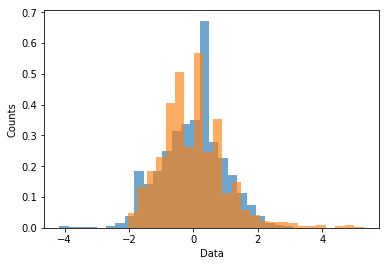

In [17]:
#concatenated_df.hist(bins=30)
#std_df.plot.hist(bins=20, alpha=0.5)

#concatenated_df["1m-parede"].plot.hist(bins=30, alpha=0.5)
plt.hist(std_df["1m-parede"].dropna(), bins=25, alpha=0.65, density=True)
plt.hist(std_df["10m-parede"].dropna(), bins=25, alpha=0.65, density=True)
plt.ylabel('Counts')
plt.xlabel('Data');


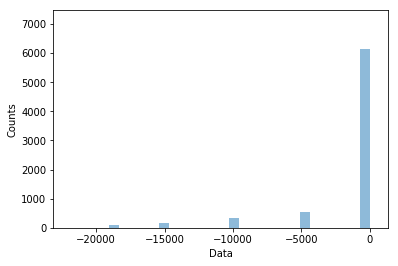

In [25]:
plt.hist(concatenated_df["10m-vidro"].dropna(), bins=30, alpha=0.5)
plt.hist(concatenated_df["20cm-vidro"].dropna(), bins=30, alpha=0.5)
plt.ylabel('Counts')
plt.xlabel('Data');